# Task 2
1. Develop yourself using numpy library: 
a) a function to implement stochastic gradient descent (SGD) algorithm 
b) Adam's optimization algorithm 
for a function of two variables f(x,y).
2. Come up with a function of two variables of an arbitrary form and implement the search for its minimum using those implemented in p.1 functions - a) and b).
3. Illustrate the process of finding an extremum in the form of a graph of the dependence of the value of the difference between two successive approximations of the solution (x_next – x_prev) on the iteration number N.

In [156]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [157]:
def function (x,y):
  return np.sqrt((x**2 + y**2))

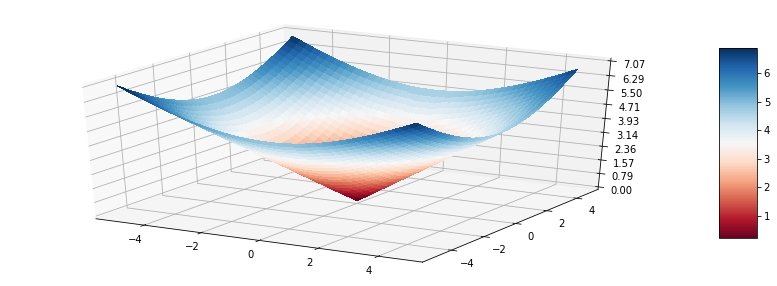

In [158]:
#plot function
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = function (X,Y)

fig = plt.figure(1, figsize = (15, 5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink = 0.7, aspect=5)
plt.show()

In [159]:
def grad(x,y):
  return np.array([x/np.sqrt((x**2 + y**2)),y/np.sqrt((x**2 + y**2))])

In [160]:
def SGD(x_prev, learn_rate):
  epsilon = 0.0001
  itter= 1
  norm=[]
  seq_x = []
  seq_y = []
  x_next = np.subtract(x_prev, learn_rate*grad(x_prev[0],x_prev[1]))
  seq_x = np.append(seq_x, x_next[0])
  seq_y = np.append(seq_y, x_next[1])
  while np.linalg.norm(np.subtract(x_next,x_prev)) > epsilon:
    if (np.random.randint(0,2)==0):
      x_prev[0] = x_next[0]
      x_next[0] = x_prev[0] - learn_rate*grad(x_prev[0],x_prev[1])[0]
      norm=np.append(norm,np.linalg.norm(np.subtract(x_next,x_prev)))
    else:
      x_prev[1] = x_next[1]
      x_next[1] = x_prev[1] - learn_rate*grad(x_prev[0],x_prev[1])[1]
      norm=np.append(norm,np.linalg.norm(np.subtract(x_next,x_prev)))
    itter +=1
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
  
  return (x_next, itter, seq_x,seq_y,norm)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


Minimum (x,y) from gradient descent: [ 0. nan]
Number of gradient descent iterations: 11


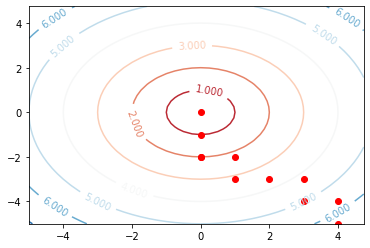

In [161]:
def contour_plot(x_seq,y_seq, x1):
    plt.figure(1)
    CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.plot(x1[0],x1[1],'ro')
    
    plt.plot(x_seq,y_seq,'ro')
    plt.show()

np.random.seed(4)
x_prev=np.random.randint(-10,10,2)
SGD_output = SGD(x_prev, 0.002)

print('Minimum (x,y) from gradient descent: %s' %SGD_output[0])
print('Number of gradient descent iterations: %s' %SGD_output[1])

contour_plot(SGD_output[2],SGD_output[3], x_prev)

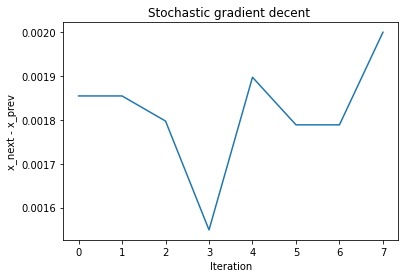

In [162]:
norm=SGD_output[4][1:]
x_axis=np.arange(len(norm))
plt.title('Stochastic gradient decent ')
plt.xlabel("Iteration")
plt.ylabel("x_next - x_prev")
plt.plot(x_axis, norm)
plt.show()

In [163]:
# adam optimization algorith for finding minimum of a function
def adam( x_init):
  alpha=0.02
  beta_1=0.9
  beta_2=0.999
  eps=1e-8
  epsilon=0.0001
  #path of independent variables travelled to reach minima
  seq_x = []
  seq_y = []
  norm_adam=[]
  # initialize first and second moments to 0
  m = np.array([0,0])
  v = np.array([0,0])
  i=1
  g = grad(x_init[0], x_init[1])
  m = beta_1 * m + (1 - beta_1) * g
  v = beta_2 * v + (1 - beta_2) * np.power(g, 2)
  m_hat = m / (1 - np.power(beta_1, i))
  v_hat =v / (1 - np.power(beta_2, i))
  x = x_init - alpha * m_hat / (np.sqrt(v_hat) + eps)
  
  seq_x=np.append(seq_x, x[0])
  seq_y=np.append(seq_y, x[1])
  norm_adam=np.append(norm_adam ,np.linalg.norm(np.subtract(x,x_init)) )
  while np.linalg.norm(np.subtract(x,x_init)) > epsilon:
    x_init=x
    g = grad(x_init[0], x_init[1])
    m = beta_1 * m + (1 - beta_1) * g
    v = beta_2 * v + (1 - beta_2) * np.power(g, 2)
    m_hat = m / (1 - np.power(beta_1, i))
    v_hat =v / (1 - np.power(beta_2, i))
    x = x_init - alpha * m_hat / (np.sqrt(v_hat) + eps)
    i+=1
    seq_x = np.append(seq_x, x[0])
    seq_y = np.append(seq_y, x[1])
    norm_adam=np.append(norm_adam ,np.linalg.norm(np.subtract(x,x_init)) )

  return ( x, i, seq_x,seq_y,norm_adam)

Minimum (x,y) from gradient descent: [0.00343713 0.00064898]
Number of gradient descent iterations: 757


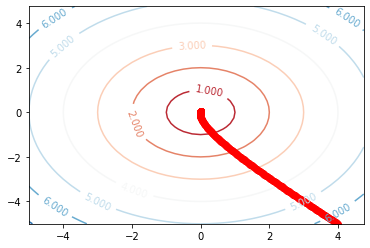

In [164]:
def contour_plot(x_seq,y_seq, x1):
    plt.figure(1)
    CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.plot(x1[0],x1[1],'ro')
    
    plt.plot(x_seq,y_seq,'ro')
    plt.show()

np.random.seed(4)
adam_output = adam(x_init)

print('Minimum (x,y) from gradient descent: %s' %adam_output[0])
print('Number of gradient descent iterations: %s' %adam_output[1])

contour_plot(adam_output[2],adam_output[3], x_init)

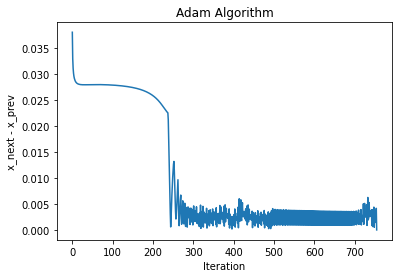

In [165]:
norm_adam=adam_output[4][1:]
x_axis=np.arange(len(norm_adam))
plt.title('Adam Algorithm')
plt.xlabel("Iteration")
plt.ylabel("x_next - x_prev")
plt.plot(x_axis, norm_adam)
plt.show()